## BoomBikes Bike-Sharing service demand prediction

**Business Understanding**:
> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**Business Objective**:
> You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

**Data Understanding**:
> - `day.csv` contains all the information of bike rental

> - You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 
> - You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 

**Importing all the necessary modules**

In [1]:
# import libraries
from math import ceil
import pandas as pd
import numpy as np
# data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# multiple linear regression model libs: statsmodel and sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# warnings: Suppress warnings
# warnings: Supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Fine tune notebook settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('expand_frame_repr', True)

**1. Reading and Understading Data**

**1.1: Importing the dataset**

In [4]:
# Importing data from day.csv
df = pd.read_csv('day.csv', header=0) # read csv file and load in dataframe

**1.2: Understanding the dataset**

In [5]:
# Checking the rows and columns of raw dataset
df.shape

(730, 16)

In [6]:
# Checking information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Data Dictionary**

- **instant**: record index
- **dteday**: date
- **season**: season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr**: year (0: 2018, 1:2019)
- **mnth**: month ( 1 to 12)
- **holiday**: weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- **weekday**: day of the week
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
+ **weathersit**: 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **hum**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered	

In [7]:
# Checking first 5 rows of the raw dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Numberical values
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insight**:
- There are 730 rows and 16 columns
- Instant column is a autoincrement index column, Not relevant for analysis

**2. Data Cleaning and Manipulation**

**2.1 Null Values**

In [9]:
# check for null values, if null value percentage above 40% drop the columns
round((df.isnull().sum()*100/len(df)).sort_values(ascending = False), 2)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

**Insight:** Data is clean, no null values found for any column

**2.2 Analyse and Drop Irrelevant Columns**

In [10]:
# Instant colums is a index columns (Automincrement), dteday is date, we already have: weekDay, month and year column
df.drop(['instant', 'dteday'], axis='columns', inplace=True)

In [11]:
# Checking dataset shape
df.shape

(730, 14)

In [12]:
# Rename columns of raw dataset to more descriptive column name
columns = {'yr' : 'year', 'mnth': 'month', 'workingday': 'workingDay', 'weathersit': 'weatherSituation', 'windspeed': 'windSpeed', 'atemp': 'feltTemp', 'hum': 'humidity', 'casual': 'rental', 'registered': 'booking', 'cnt': 'totalRentals'}
df.rename(columns=columns, inplace=True)

In [13]:
# Checking columns after renaming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    int64  
 1   year              730 non-null    int64  
 2   month             730 non-null    int64  
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    int64  
 5   workingDay        730 non-null    int64  
 6   weatherSituation  730 non-null    int64  
 7   temp              730 non-null    float64
 8   feltTemp          730 non-null    float64
 9   humidity          730 non-null    float64
 10  windSpeed         730 non-null    float64
 11  rental            730 non-null    int64  
 12  booking           730 non-null    int64  
 13  totalRentals      730 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.0 KB


**Verify Data Quality**

- Check both Holiday and WorkingDay should not occur in same day.
    - Weekend or Holiday condition: Holiday: 0 and WorkingDay: 0
    - Weeday Condition: Holiday: 0 and WorkingDay: 1

**3. Data Visualisation**

**3.1 Visualising Continous Numerical Variable**

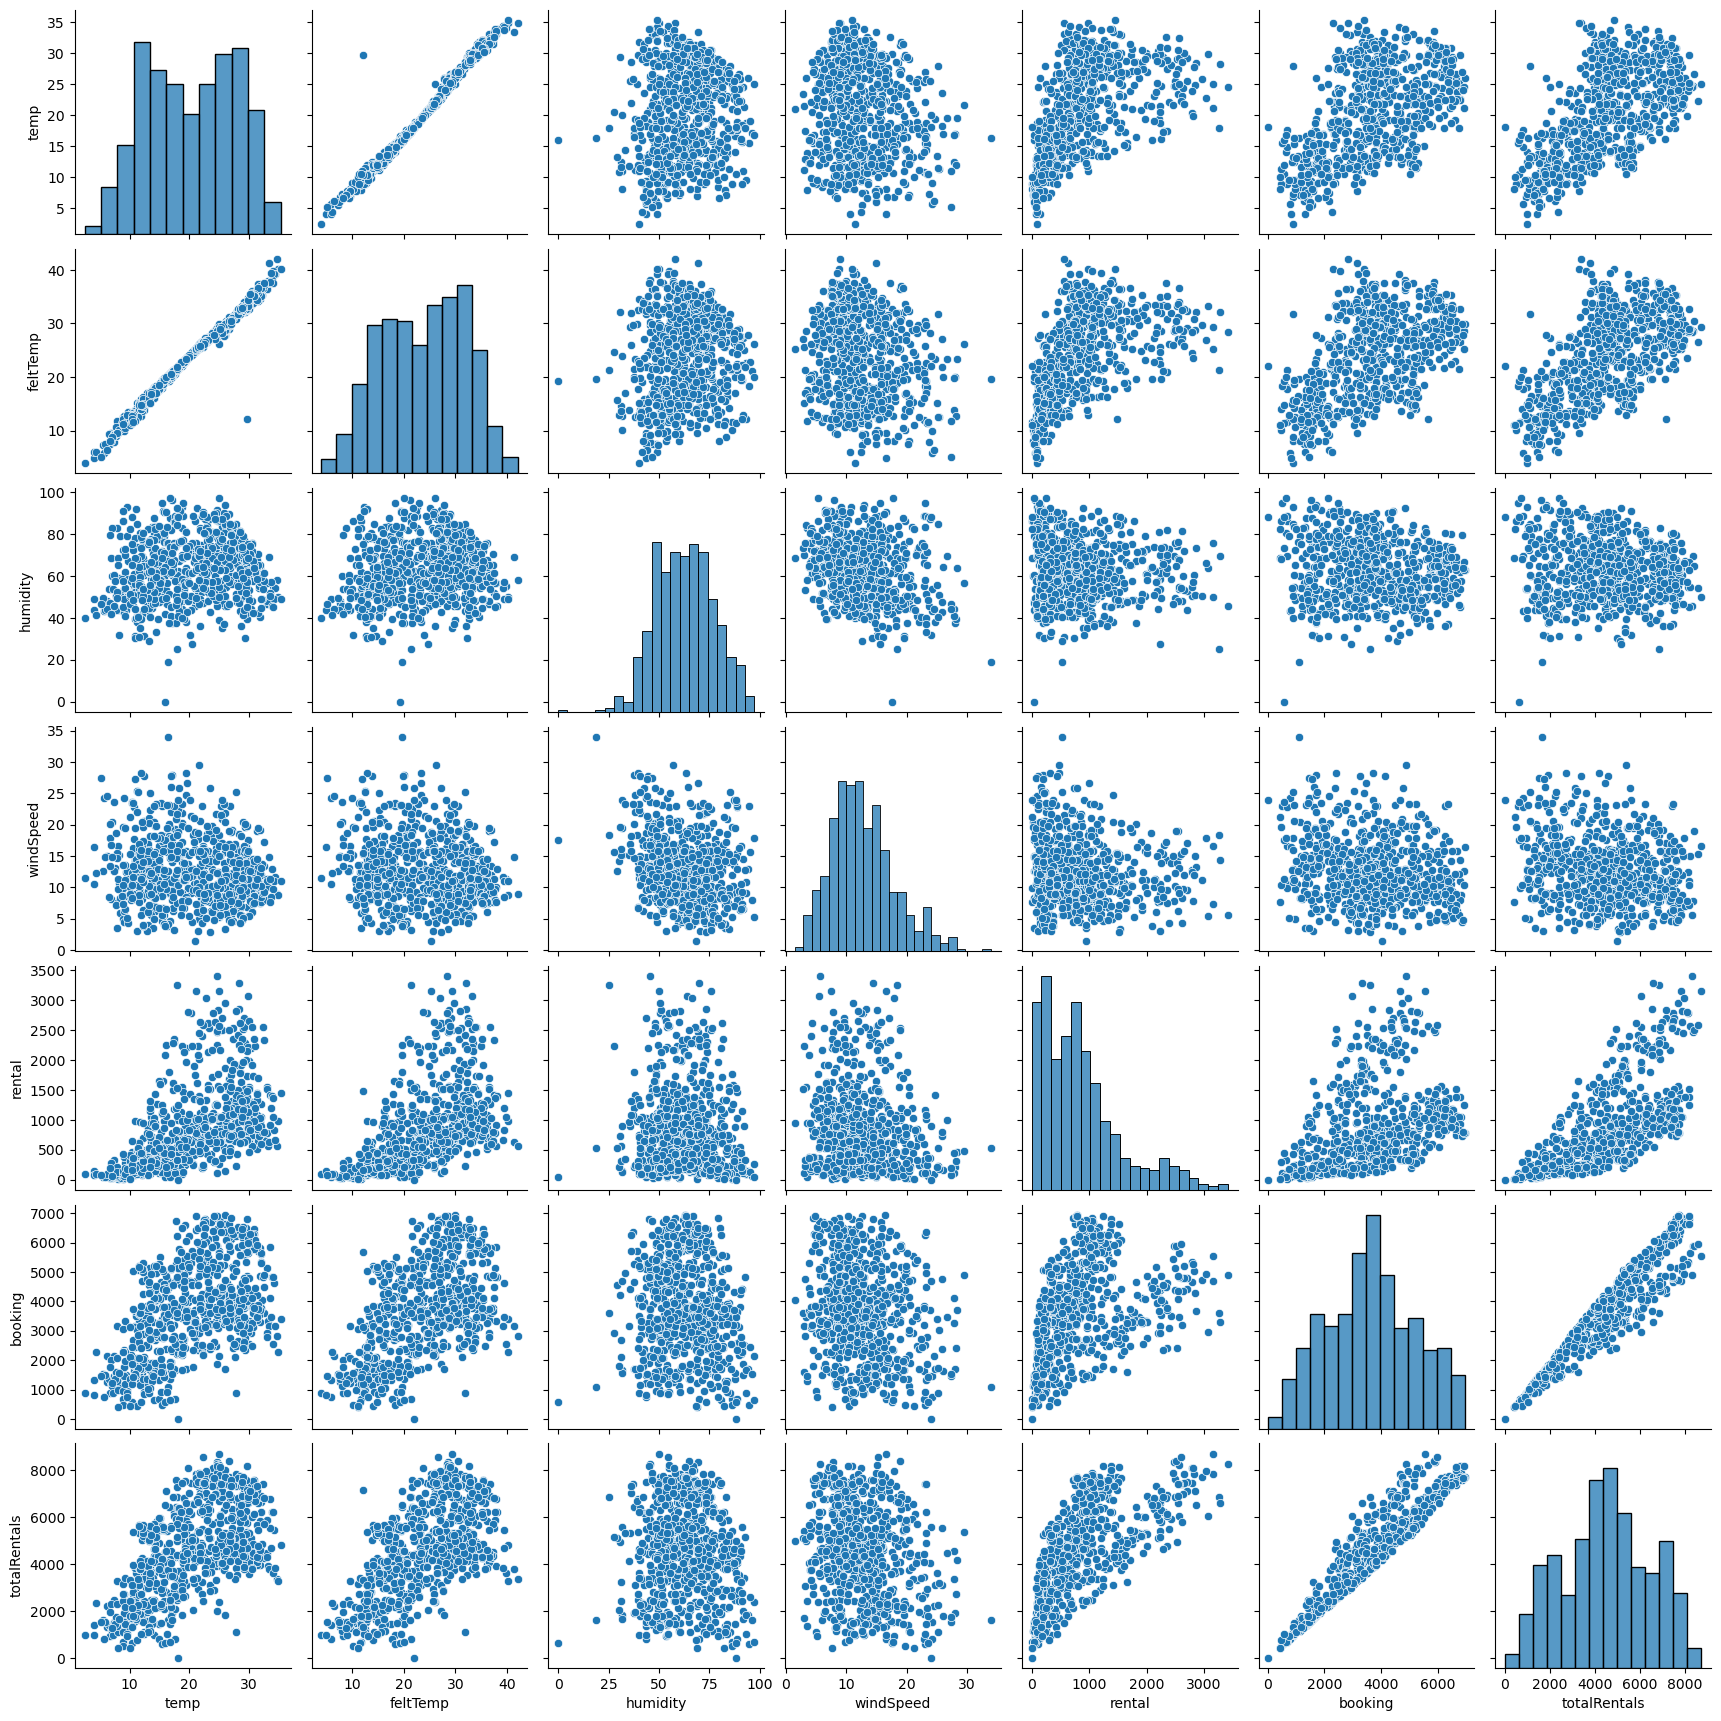

In [15]:
# Visualising continous numerical variables correlation
target_variable = 'totalRentals'
continous_variable = ['temp','feltTemp','humidity','windSpeed','rental','booking']
sns.pairplot(df[continous_variables + [target_variable]])
plt.show()

In [16]:
# Checking correlation between variables using heatmap
df.corr()

,season,year,month,holiday,weekday,workingDay,weatherSituation,temp,feltTemp,humidity,windSpeed,rental,booking,totalRentals
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
year,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
month,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingDay,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weatherSituation,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
feltTemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
humidity,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543


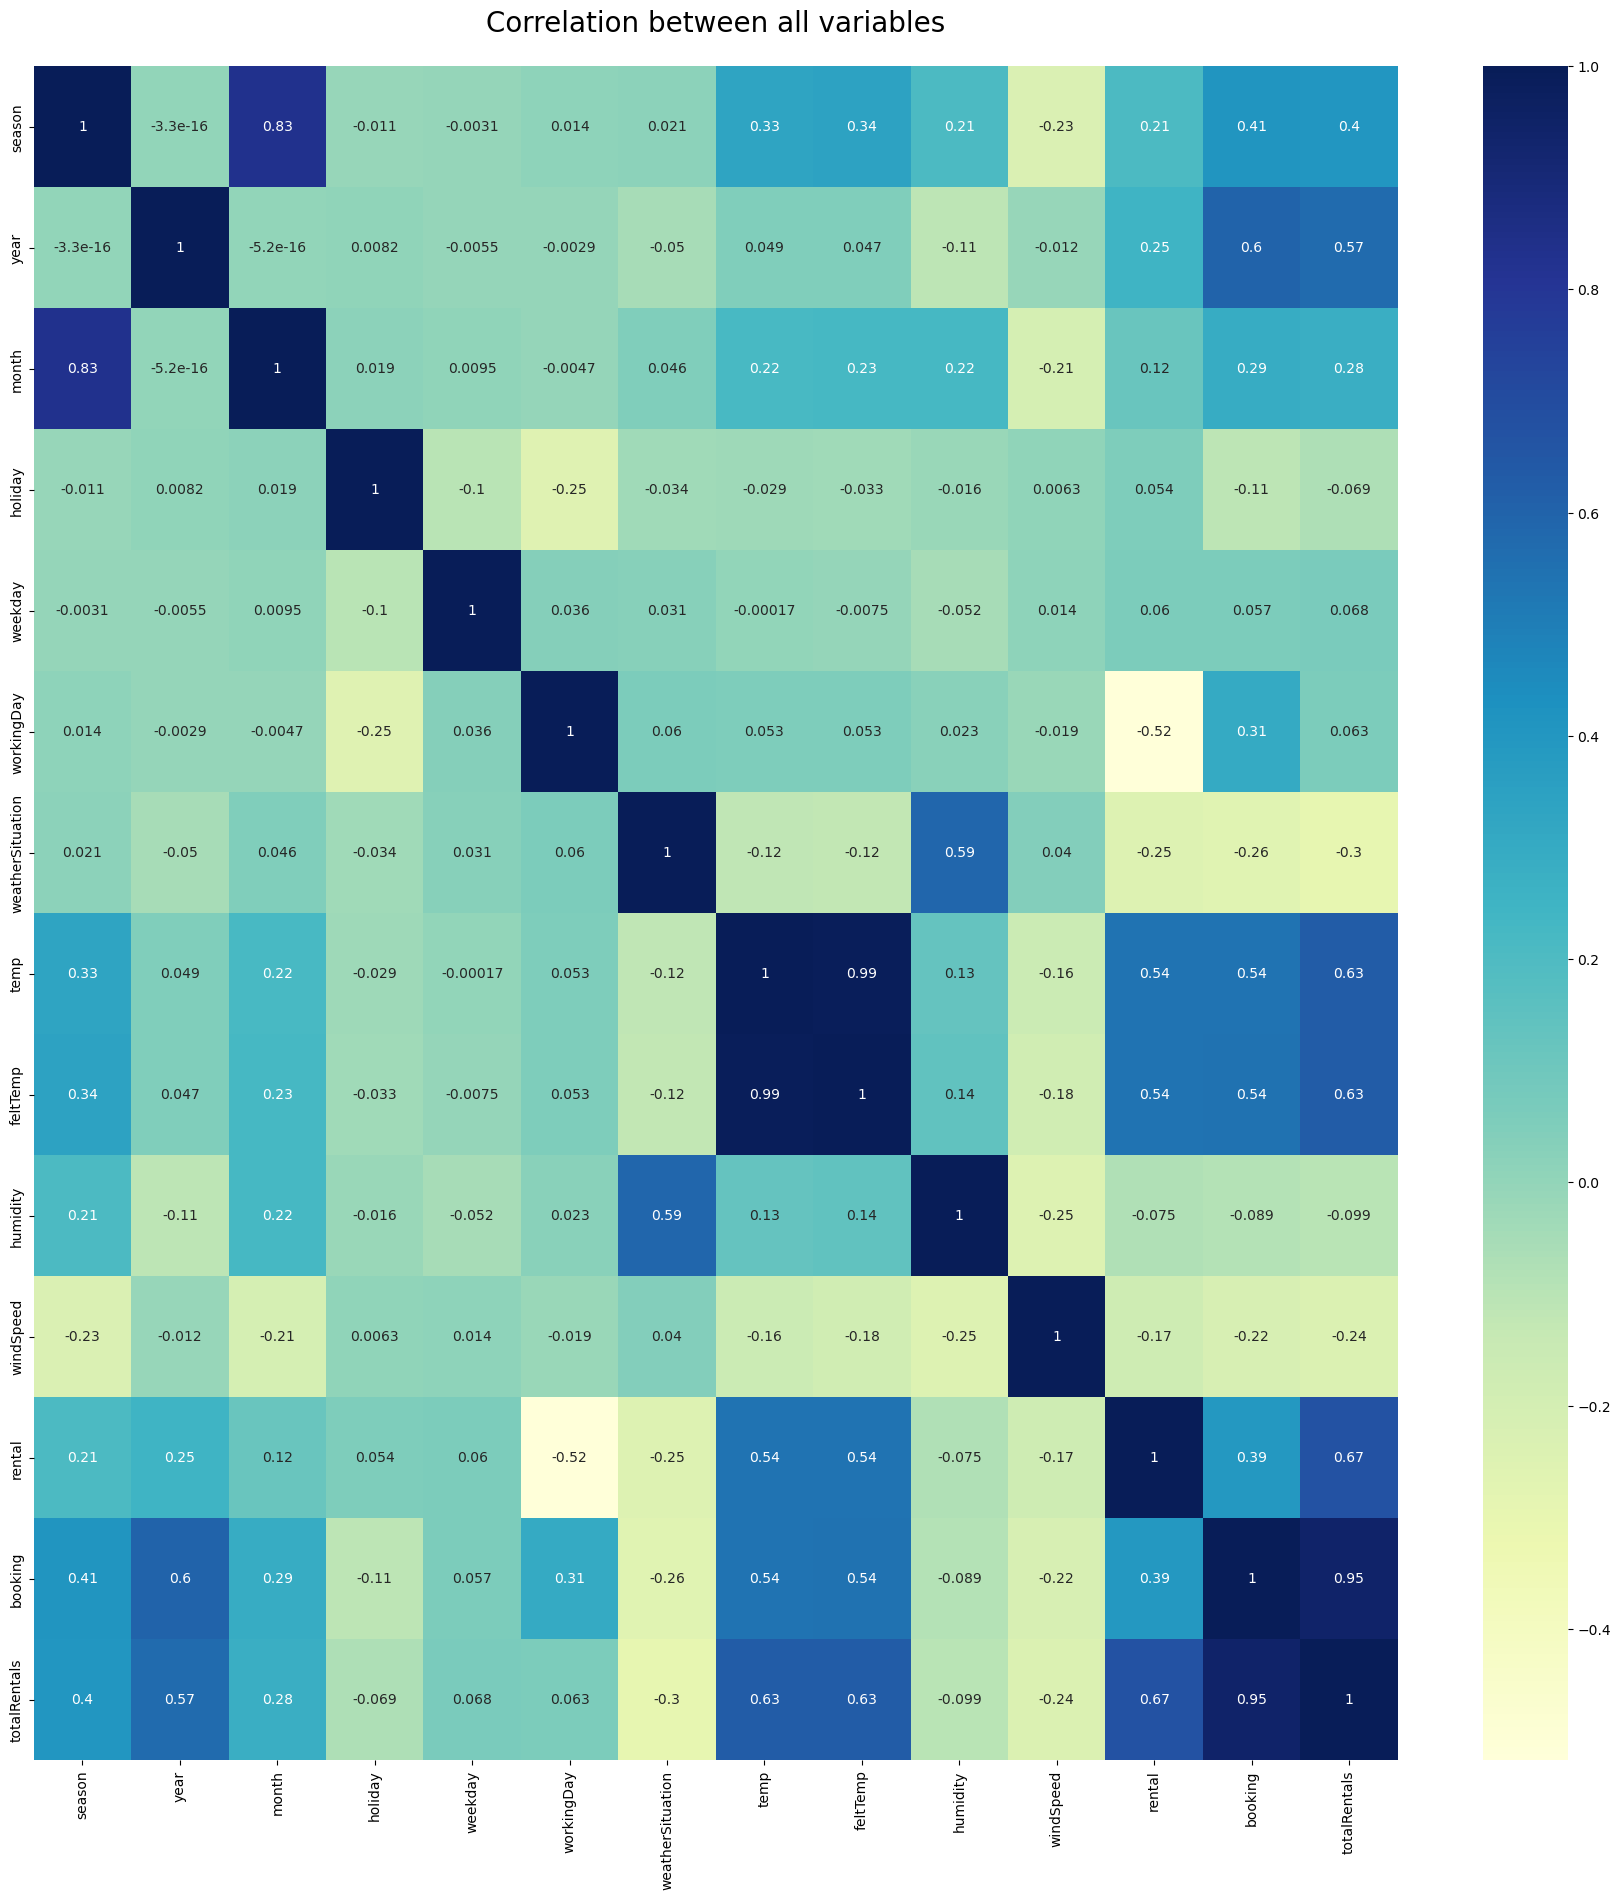

In [17]:
plt.figure(figsize= [22, 22])

sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)

plt.title("Correlation between all variables", fontdict={"fontsize":20}, pad=25)
plt.show()

- Target variable totalRentals is postiviely correlated with, Year, Month, Weekday, WorkingDay, temp, feltTemp, Rental and Booking columns.
- Target variable totalRentals is negatively correlated with Holiday, WeatherSituation, Humidity, windSpeed.
- Temp and feltTemp positively correlated.

**3.2 Visualising Categorical Variable**

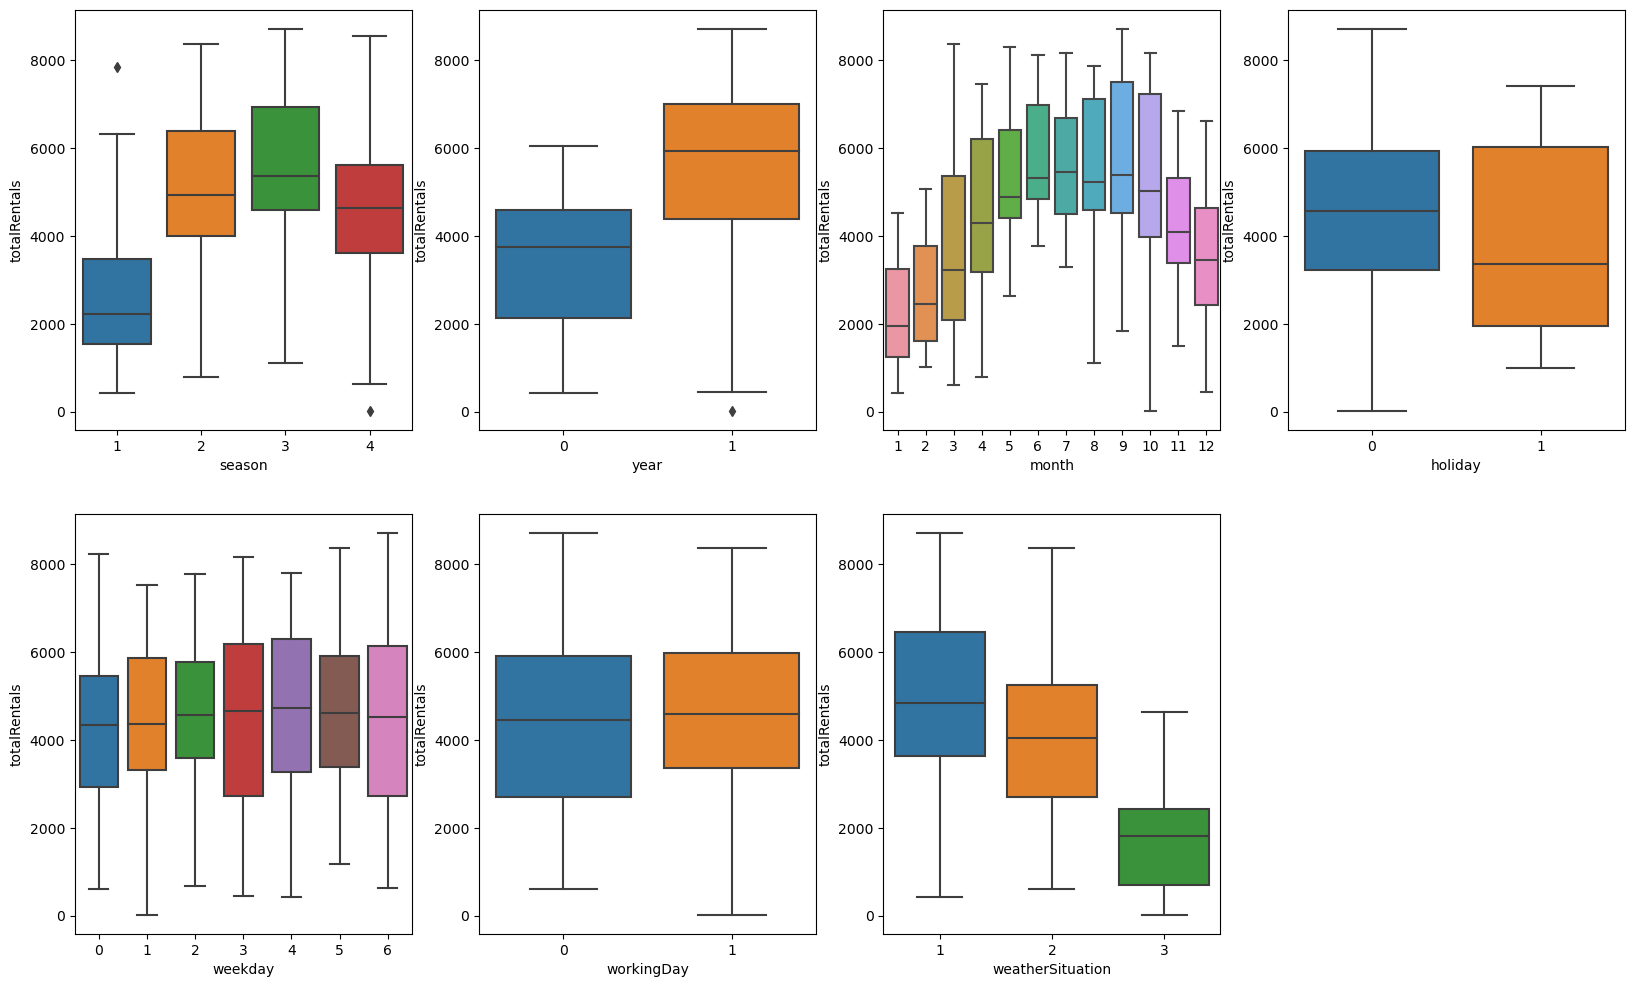

In [18]:
categorical_variables = ['season', 'year', 'month', 'holiday', 'weekday', 'workingDay', 'weatherSituation']

plt.figure(figsize=(20, 12))

# Iterate over all categorical variable and print boxplot
for idx, cat_var in enumerate(categorical_variables):
    plt.subplot(2,4,idx+1)
    sns.boxplot(data=df, x=cat_var, y=target_variable)

plt.show()

**Insight:**
- Median bike rentals is highest for fall season. DD: season (1: Spring, 2: Summer, 3: Fall, 4: Winter)
- Max bike rentals is for fall season.
- Median and Max bike rentals is highest for Y2019. DD: 1: Y2018, 2: Y2019.
- Max bike rentals is for month September. (DD: 1: January, 2: Febuary, 3: March, ... 9: September, 10: October, ...).
- Median bike rentals is highest for month July. (Refer DD above)
- Lowest bike rentals is for month October. (Refer DD above)
- Median and Max bike rentals is for no holiday days marked with 0.
- Weekdays Median for bike rentals is close.
- WorkingDay median for bike rentals is also close.
- Median and Max bike rentals for weather situation is higest for Clear weather (1: Clear, Few clouds, Partly cloudy, Partly cloudy) and Lowest for weather situation Rain/Thunderstorm (3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

**4. Data Preparation**

**4.1 Data Encoding**: Creating dummy variables

In [19]:
weekdays_dummy = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'
}
seasons_dummy = {
    1: 'Spring', 
    2: 'Summer', 
    3: 'Fall', 
    4: 'Winter'
}
months_dummy = {
    1: 'January', 
    2: 'Febuary', 
    3: 'March', 
    4: 'April', 
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October', 
    11: 'November', 
    12: 'December'
}
weather_situations_dummy = {
    1: 'PartlyCloudy', 
    2: 'Mist', 
    3: 'LightRain', 
    4: 'HeavyRain'
}

dummyDict = {'weekday': weekdays_dummy, 'season': seasons_dummy, 'month': months_dummy, 'weatherSituation': weather_situations_dummy}

for key, val in dummyDict.items():
     df[key] = df[key].apply(lambda x: val[x])
    

In [247]:
df.head()

,season,year,month,holiday,weekday,workingDay,weatherSituation,temp,feltTemp,humidity,windSpeed,rental,booking,totalRentals
0,Spring,0,January,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,January,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,January,0,Tuesday,1,PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,January,0,Wednesday,1,PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,January,0,Thursday,1,PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# Creating dummy variables
for key, _ in dummyDict.items():
        df = pd.concat([df, pd.get_dummies(df[key], drop_first=True)], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            730 non-null    object 
 1   year              730 non-null    int64  
 2   month             730 non-null    object 
 3   holiday           730 non-null    int64  
 4   weekday           730 non-null    object 
 5   workingDay        730 non-null    int64  
 6   weatherSituation  730 non-null    object 
 7   temp              730 non-null    float64
 8   feltTemp          730 non-null    float64
 9   humidity          730 non-null    float64
 10  windSpeed         730 non-null    float64
 11  rental            730 non-null    int64  
 12  booking           730 non-null    int64  
 13  totalRentals      730 non-null    int64  
 14  Monday            730 non-null    uint8  
 15  Saturday          730 non-null    uint8  
 16  Sunday            730 non-null    uint8  
 1

In [22]:
df.head()

,season,year,month,holiday,weekday,workingDay,weatherSituation,temp,feltTemp,humidity,windSpeed,rental,booking,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
0,Spring,0,January,0,Sunday,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,Spring,0,January,0,Monday,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,Spring,0,January,0,Tuesday,1,PartlyCloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,Spring,0,January,0,Wednesday,1,PartlyCloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,Spring,0,January,0,Thursday,1,PartlyCloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [23]:
# Drop columns which are added as dummy variables
df.drop(list(dummyDict.keys()) + ['rental', 'booking'], inplace=True, axis=1)
df.shape

(730, 30)

In [24]:
df.head()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


**5. Linear Regression**

**5.1: Split dataset using sklearn**

In [25]:
# split the dataset into training datasey 70% and testing dataset 30%
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [26]:
df_train.shape

(510, 30)

In [27]:
df_train.head()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [28]:
df_test.shape

(219, 30)

In [29]:
df_test.head()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


**5.2: Feature Scaling: Method to normalize the independendent variable or feature in data**

In [30]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
scaler = MinMaxScaler() # Scale variables using MinMaxScaler except the 0-1 and dummy variables like Monday, January
numerical_variables = ["temp", "feltTemp", "humidity", "windSpeed", "totalRentals"]
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [31]:
df_train.head()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [32]:
df_train.describe()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


After applying feature scaling on the dataset, We can see the features scaled from Min 0 to Max 1.

**5.3 Model Building**

In [33]:
# Pop the target variable totalRentals assign it to y-axis and feature variables to x-axis
y_train = df_train.pop('totalRentals')
X_train = df_train

In [34]:
y_train.describe()

count    510.000000
mean       0.513620
std        0.224593
min        0.000000
25%        0.356420
50%        0.518638
75%        0.684710
max        1.000000
Name: totalRentals, dtype: float64

In [35]:
X_train.describe()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.343137,0.627451
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.475223,0.483958
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**5.3.1 Feature/Variable Selection Algorithm**
There are multiple ways to select feature for your machine learning model
- Backward Elimination: Add all the variables in equation and remove sequentially. The variable with smallest partial correlation with the dependent variable is considered first for removal. If it meets the criteria for elimination, it is removed.
- Forward Selection: It's opposite of Backward Elimination method, Selection procedure in which variables are sequentially entered in the model.


**Feature Selection through RFE**

In [36]:
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression()

In [37]:
features_to_select = ceil(X_train.shape[1] / 2)
rfe = RFE(lrm, n_features_to_select=features_to_select, step=1)
rfe = rfe.fit(X_train, y_train)

In [38]:
# Consolidate feature/variables with rfe support and ranking
pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), columns=['Feature', 'Support', 'Ranking'])

,Feature,Support,Ranking
0,year,True,1
1,holiday,True,1
2,workingDay,True,1
3,temp,True,1
4,feltTemp,False,6
5,humidity,True,1
6,windSpeed,True,1
7,Monday,True,1
8,Saturday,False,11
9,Sunday,True,1


In [39]:
# Feature in support from RFE
rfe_supported = X_train.columns[rfe.support_]
pd.DataFrame(rfe_supported, columns=['Feature'])

,Feature
0,year
1,holiday
2,workingDay
3,temp
4,humidity
5,windSpeed
6,Monday
7,Sunday
8,Spring
9,Summer


In [40]:
# Feature not in support from RFE
pd.DataFrame(X_train.columns[~rfe.support_], columns=['Feature'])

,Feature
0,feltTemp
1,Saturday
2,Thursday
3,Tuesday
4,Wednesday
5,August
6,December
7,Febuary
8,January
9,June


**Model building using statsmodel for better Statistics**

In [41]:
# Calculate the VIFs for the new model
def calculate_VIF(col,X_train):
    vif = pd.DataFrame()
    vif['Features'] = col
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    display(vif)

In [42]:
# Creating X_test dataframe with RFE supported variables
X_train_rfe = X_train[rfe_supported]

In [43]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the 1st linear model

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.13e-191
Time:                        20:10:29   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0018      0.038      0.049   

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

Looking at the p-values, it looks like holiday variable is not really significant (in the presence of other variables).

Maybe we could drop it?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

**Checking VIF**
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:


In [46]:
calculate_VIF(rfe_supported, X_train)

,Features,VIF
2,workingDay,94.57
7,Sunday,22.15
6,Monday,21.46
14,PartlyCloudy,10.23
13,Mist,8.84
8,Spring,5.02
1,holiday,4.66
3,temp,3.62
10,Winter,3.49
9,Summer,2.61


> We need to bring all VIFs below 5 to avoid multicollinearity issue.

In [47]:
X_train_new = X_train[rfe_supported].drop(["holiday"], axis = 1) # dropping holiday variable

In [48]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [49]:
lm_2 = sm.OLS(y_train,X_train_lm).fit()   # Running the 2nd linear model

In [50]:
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 17 May 2023   Prob (F-statistic):          1.13e-191
Time:                        20:12:02   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0664      0.053     -1.246   

In [51]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
3,humidity,28.16
2,temp,21.93
1,workingDay,21.42
13,PartlyCloudy,16.59
12,Mist,9.63
7,Spring,5.67
6,Sunday,5.60
5,Monday,5.45
4,windSpeed,4.78
9,Winter,4.12


**Model 3**

In [52]:
X_train_new = X_train_new.drop(["humidity"], axis = 1) # dropping "hum" variable

In [53]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [54]:
lm_3 = sm.OLS(y_train,X_train_lm).fit()   # Running the 3rd linear model

In [55]:
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 17 May 2023   Prob (F-statistic):          5.73e-189
Time:                        20:12:12   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1899      0.046     -4.173   

In [56]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
1,workingDay,18.80
12,PartlyCloudy,16.47
2,temp,16.00
11,Mist,9.38
5,Sunday,5.05
4,Monday,4.84
6,Spring,4.72
3,windSpeed,4.71
8,Winter,3.15
7,Summer,2.97


**Model 4**:

In [57]:
X_train_new = X_train_new.drop(["Monday"], axis = 1) # dropping "Monday" variable because its p-value is greater than 0.05

In [58]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [59]:
lm_4 = sm.OLS(y_train,X_train_lm).fit()   # Running the 4th linear model

In [60]:
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 17 May 2023   Prob (F-statistic):          3.28e-189
Time:                        20:12:27   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1400      0.039     -3.605   

In [61]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
11,PartlyCloudy,14.33
2,temp,13.36
10,Mist,8.10
1,workingDay,4.72
3,windSpeed,4.62
5,Spring,4.12
6,Summer,2.77
7,Winter,2.72
0,year,2.07
4,Sunday,1.84


**Model 5**:

In [64]:
X_train_new = X_train_new.drop(["September"], axis = 1) ## dropping September

In [65]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [66]:
lm_5 = sm.OLS(y_train,X_train_lm).fit()   # Running the 5th linear model

In [67]:
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Wed, 17 May 2023   Prob (F-statistic):          2.81e-186
Time:                        20:14:55   Log-Likelihood:                 496.64
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     498   BIC:                            -918.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1072      0.039     -2.762   

In [68]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
10,PartlyCloudy,14.20
2,temp,13.09
9,Mist,7.99
1,workingDay,4.71
3,windSpeed,4.62
5,Spring,3.94
7,Winter,2.61
6,Summer,2.46
0,year,2.07
4,Sunday,1.84


**Model 6**:

In [69]:
X_train_new = X_train_new.drop(["July"], axis = 1) ## dropping month_7

In [70]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [71]:
lm_6 = sm.OLS(y_train,X_train_lm).fit()   # Running the 6th linear model

In [72]:
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Wed, 17 May 2023   Prob (F-statistic):          6.50e-184
Time:                        20:15:24   Log-Likelihood:                 488.20
No. Observations:                 510   AIC:                            -954.4
Df Residuals:                     499   BIC:                            -907.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1134      0.039     -2.879   

In [73]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
9,PartlyCloudy,14.19
2,temp,12.35
8,Mist,7.99
1,workingDay,4.71
3,windSpeed,4.62
5,Spring,3.87
7,Winter,2.48
6,Summer,2.24
0,year,2.07
4,Sunday,1.84


**Model 7**

In [74]:
X_train_new = X_train_new.drop(['Sunday'], axis = 1) ## dropping Sunday

In [75]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)

In [76]:
lm_7 = sm.OLS(y_train,X_train_lm).fit()   # Running the 7th linear model

In [77]:
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.6
Date:                Wed, 17 May 2023   Prob (F-statistic):          9.63e-181
Time:                        20:15:37   Log-Likelihood:                 477.84
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     500   BIC:                            -893.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0748      0.039     -1.907   

In [78]:
calculate_VIF(X_train_new.columns,X_train_new)

,Features,VIF
8,PartlyCloudy,14.02
2,temp,11.97
7,Mist,7.84
3,windSpeed,4.58
4,Spring,3.80
1,workingDay,3.03
6,Winter,2.43
5,Summer,2.23
0,year,2.07


- Model 7 is the final model
- R-Squared value 0.832 and adjusted R-Squared value is 0.828.
- All VIFs are now below 5.
- All p-values are below 0.05 (Rejecting the NULL hypothesis)

**Residual Analysis of the train data**

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_pred = lm_7.predict(X_train_lm)

In [84]:
## Looking at the RMSE

#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_train, y_train_pred))

0.0948091481637469

Text(0.5, 0, 'Errors')

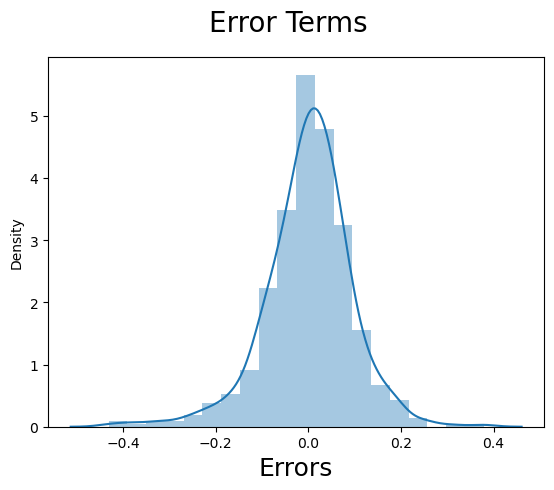

In [85]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

The residuals are following the normally distributed with a mean 0. All good!

Looking for patterns in the residuals

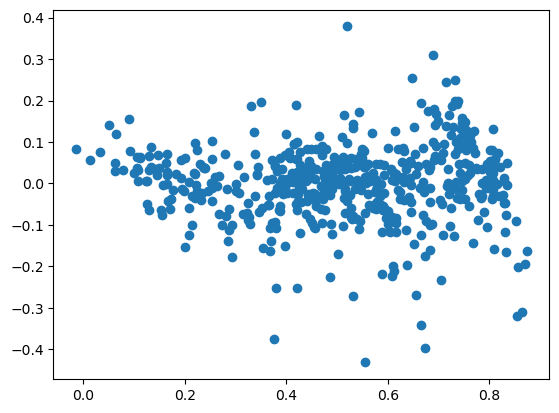

In [87]:
plt.scatter(y_train_pred, (y_train - y_train_pred))
plt.show()

From above plot we can see that residuals (also known as error terms) are independent. This means that there is no correlation between the residuals and the predicted values, or among the residuals themselves.

**We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.**

**Making Predictions**

*Applying the scaling on the test sets*

In [88]:
# Apply scaler() to all the columns except the '0-1' and 'dummy' variables
numerical_vars = ['temp', 'feltTemp', 'humidity', 'windSpeed', 'totalRentals']

df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [89]:
df_test.head()

,year,holiday,workingDay,temp,feltTemp,humidity,windSpeed,totalRentals,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Spring,Summer,Winter,August,December,Febuary,January,July,June,March,May,November,October,September,Mist,PartlyCloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [90]:
y_test = df_test.pop('totalRentals')
X_test = df_test

In [91]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [92]:
# Making predictions
y_pred = lm_7.predict(X_test_new)

**Model Evaluation**

Text(0, 0.5, 'y_pred')

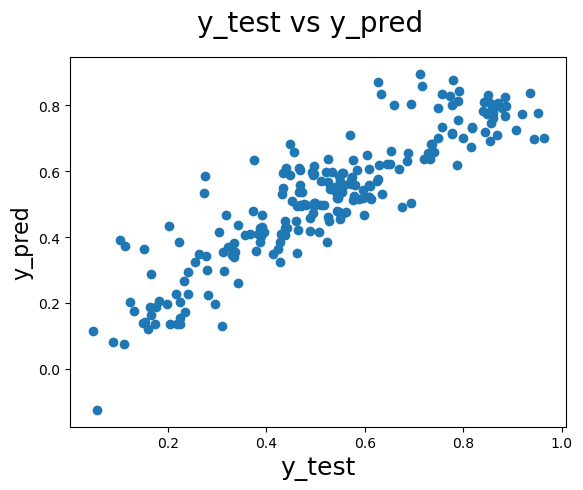

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

**Looking at the RMSE**

In [94]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09796584976475083

In [95]:
R2 = r2_score(y_test, y_pred)
R2

0.7979335841646802

In [96]:
adj_R2 = 1-(1-R2)*(219-1)/(219-12-1)
adj_R2

0.7861627249898072

So final r2_score (R-Squared) for test set is 0.8069068816299572.
And Adjusted R-Squared value for test set is 0.7956587388122848

In [97]:
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:           totalRentals   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.6
Date:                Wed, 17 May 2023   Prob (F-statistic):          9.63e-181
Time:                        20:26:06   Log-Likelihood:                 477.84
No. Observations:                 510   AIC:                            -935.7
Df Residuals:                     500   BIC:                            -893.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0748      0.039     -1.907   

**Conclusions**

**Insight from EDA and Data visualisation:** 
- Year: Increase in bike sharing business in year 2019 in comparison of year 2018 (Boxplot)
- Holiday: There is a decrease in the bike sharing business in Holidays (Boxplot)
- Temperature: Bike sharing business is impacted from the temperature feature
- Season: Both Winter and Summer Season having positive impact on bike sharing business,
- Month: August, September having higher median compared to other months.
- From the box plot above other variables correlation can be derived.

**Feature variables:**
-	year
-	holiday
-	workingDay
-	temp
-	humidity
-	windSpeed
-	Monday
-	Sunday
-	Spring
-	Summer
-	Winter
-	July
-	September
-	Mist
-	PartlyCloudy

BoomBikes should consider above features for predicting the business.